<a href="https://colab.research.google.com/github/Sreekeshr/Agriprotec/blob/main/main_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
''' Constructing a basic CNN model for basic elephant and wild boar detection .
    purpose : impulse hackathon
    Purpose : The model is designed to detect the presence of Elephants and wild boars in a stream/frame of image.
              The model is train on elephant and wild boar dataset obtained from kaggle(https://www.kaggle.com/shivanandbaragali/elephants and https://drive.google.com/drive/u/0/folders/1_2t86MNNSBCuI3Fn7pfVxOHBFFTGI4LZ).
              A CNN model for the same based on a suitable architecture and are used for the detection of animals.
              Accuracy of the system is around 60 percernt.




'''


In [ ]:
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from IPython.display import SVG


In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

def plot_example_images(plt):
    img_size = 50
    plt.figure(0, figsize=(12,20))
    ctr = 0

    for animal in os.listdir("/content/drive/MyDrive/Images/Train/"):
        for i in range(0,len(os.listdir("/content/drive/MyDrive/Images/Train/"+ animal))-50):
            ctr += 1
            plt.subplot(7,5,ctr)
            img = load_img("/content/drive/MyDrive/Images/Train/" + animal + "/" +os.listdir("/content/drive/MyDrive/Images/Train/" + animal)[i], target_size=(img_size, img_size))
            plt.imshow(img, cmap="gray")

    plt.tight_layout()
    return plt


In [ ]:




# Loading Image data
def load_img_data():
  PATH = '/content/drive/MyDrive/Images/Train'
  animal_dir_list = os.listdir(PATH)
  final_img_data = []

  for ani in animal_dir_list:
    img_list = sorted(os.listdir(PATH + '/' + ani))
    print('images are loaded...')
    for img in img_list:
      samp_input_img =  cv2.imread(PATH + '/' + ani + '/' + img)
      if samp_input_img is not None:
        final_img = cv2.resize(samp_input_img,(50,50))
        final_img_data.append(final_img)
      else:
        print("img not properly resized..")
      

load_img_data()

images are loaded...
img not properly resized..
images are loaded...


In [ ]:
import numpy as np
import os
 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_size = 100
batch_size = 64


datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)

train_generator = datagen.flow_from_directory("/content/drive/MyDrive/Images/Train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode = 'grayscale',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=True)

validation_generator = datagen.flow_from_directory("/content/drive/MyDrive/Images/Test/",
                                                              target_size=(img_size,img_size),
                                                              color_mode='grayscale',
                                                              batch_size=batch_size,
                                                              class_mode='binary',
                                                              shuffle = False)

Found 1474 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


In [ ]:
# import os
# dir = os.listdir('/content/drive/MyDrive/Images/Test/')
# print(dir)
# file_path = ('/content/drive/MyDrive/Images/Test/.ipynb_checkpoints')
# os.rmdir(file_path)

['Elephant', 'Wild_Boar']


In [ ]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(512,(38,38), padding='same', input_shape=(100, 100,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(1028,(19,19), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(1024,(19,19), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(10,10), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(10,10), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 512)     739840    
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 512)     2048      
_________________________________________________________________
activation (Activation)      (None, 100, 100, 512)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 512)       0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 512)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 1028)      190008324 
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 1028)      4

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
epochs = 10
batch_size = 32


steps_per_epoch = 20
validation_steps = 20
print(steps_per_epoch)

history = model.fit(x=train_generator,
                        steps_per_epoch=steps_per_epoch,
                        epochs= epochs,
                        validation_data = validation_generator,
                        validation_steps=validation_steps)

model.save("model.h5")

model_json = model.to_json()
with open("model.json","w") as json_file :
    json_file.write(model_json)


20
Epoch 1/10


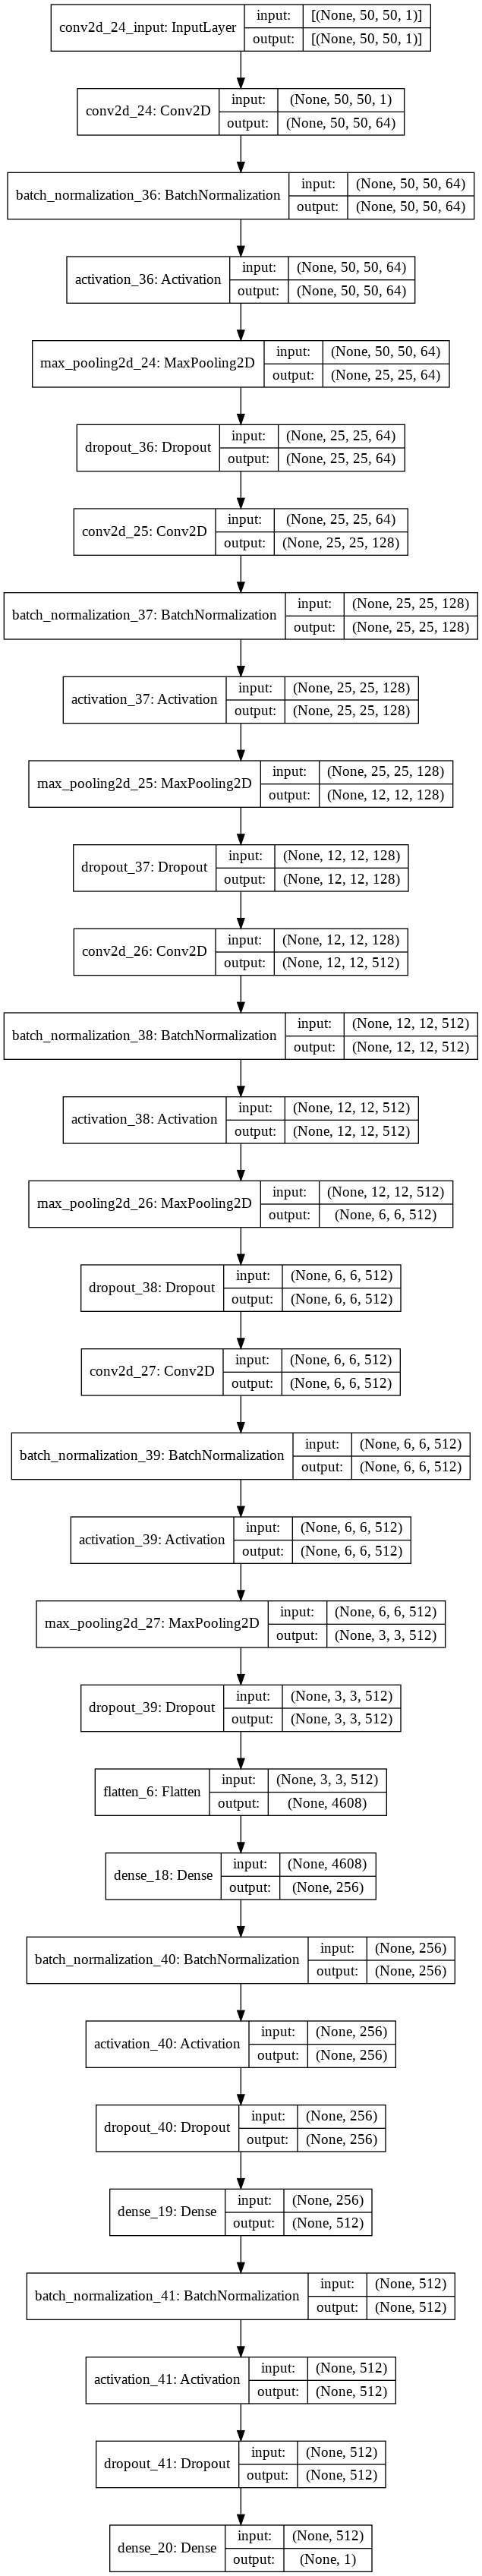

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=400, height=200)